In [1]:
# 환경 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts -nanum

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

E: Command line option 'n' [from -nanum] is not understood in combination with the other options.


In [2]:
# 사용 패키지 불러오기
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 구글 코랩에 파일 불러오기
from google.colab import files
files.upload()

Saving KakaoTalkS.txt to KakaoTalkS.txt


{'KakaoTalkS.txt': b"\xec\x84\xb1\xec\x88\x98 \xeb\x8b\x98\xea\xb3\xbc \xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4\xed\x86\xa1 \xeb\x8c\x80\xed\x99\x94\r\n\xec\xa0\x80\xec\x9e\xa5\xed\x95\x9c \xeb\x82\xa0\xec\xa7\x9c : 2021-01-27 00:00:58\r\n\r\n--------------- 2020\xeb\x85\x84 5\xec\x9b\x94 19\xec\x9d\xbc \xed\x99\x94\xec\x9a\x94\xec\x9d\xbc ---------------\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\xa0\x84\xec\x97\x90 MBTI\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\x8b\xac\xeb\xa6\xac\xed\x96\x88\xeb\x8d\x98\xea\xb1\xb0\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\x96\xb4\xeb\x94\x94\xec\x95\xbc?\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] \xeb\xa7\x81\xed\x81\xac \xec\xa4\xac\xeb\x8a\x94\xeb\x8e\x85\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] \xe3\x84\xb1\xe3\x84\xb7\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] http

In [4]:
data = open('KakaoTalkS.txt', 'r')

In [5]:
# readlines() : 텍스트를 통째로 가녀오는 것으로 새로운 변수에 선언
df = data.readlines()

list = []   # 반목문을 돌리기 위해 빈 list 만들기

for i in df :
  i = i.rstrip('\n')
  i = i.strip()
  list.append(i)  # append를 이용해 빈 list에 쌓기

In [6]:
# 위 리스트를 갖고 데이터 프레임 제작
list_drop = list[4:]

In [7]:
col_names = ['words']

In [8]:
df = pd.DataFrame(list_drop, columns=col_names)
df.head()

,words
0,[성수] [오전 10:50] 전에 MBTI
1,[성수] [오전 10:50] 심리했던거
2,[성수] [오전 10:50] 어디야?
3,[ㅅㅎ🌻] [오전 10:51] 링크 줬는뎅
4,[ㅅㅎ🌻] [오전 10:51] ㄱㄷ


In [9]:
df['kakao'] = df['words'].apply(lambda x : re.sub('[^가-힣]', ' ', x))

In [10]:
df.head()

,words,kakao
0,[성수] [오전 10:50] 전에 MBTI,성수 오전 전에
1,[성수] [오전 10:50] 심리했던거,성수 오전 심리했던거
2,[성수] [오전 10:50] 어디야?,성수 오전 어디야
3,[ㅅㅎ🌻] [오전 10:51] 링크 줬는뎅,오전 링크 줬는뎅
4,[ㅅㅎ🌻] [오전 10:51] ㄱㄷ,오전


In [11]:
pip install soynlp

     |████████████████████████████████| 419kB 10.8MB/s 


In [12]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency = 100,
     min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
      )
word_extractor.train(df['kakao'].values) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.144 Gb
all cohesion probabilities was computed. # words = 3
all branching entropies was computed # words = 1073
all accessor variety was computed # words = 1073


In [13]:
from soynlp.tokenizer import LTokenizer

from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word : score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores = cohesion_score)

In [14]:
df['tokenizer'] = df['kakao'].apply(lambda x : tokenizer.tokenize(x, remove_r= True))

In [15]:
words = []
for i in df['tokenizer'].values : 
  for k in i : 
    words.append(k)

In [16]:
words

['성수',
 '오전',
 '전에',
 '성수',
 '오전',
 '심리했던거',
 '성수',
 '오전',
 '어디야',
 '오전',
 '링크',
 '줬는뎅',
 '오전',
 '오전',
 '오전',
 '이거',
 '년',
 '월',
 '일',
 '수요일',
 '오후',
 '오빠',
 '오후',
 '오늘',
 '집',
 '늦게',
 '들어가냐',
 '오후',
 '사진',
 '오후',
 '갠적으로',
 '메드어바웃초콜릿',
 '오후',
 '핵맛',
 '오후',
 '있으면',
 '먹어보세',
 '오후',
 '오후',
 '사실',
 '내가',
 '먹고싶은',
 '맛이있는데',
 '성수',
 '오후',
 '그래그래',
 '오후',
 '세종에',
 '그',
 '맛이',
 '없어',
 '오후',
 '오빠랑',
 '채련이',
 '요즘',
 '열공하시길래',
 '응원차',
 '보낸거얌',
 '오후',
 '안농',
 '오후',
 '이모티콘',
 '성수',
 '오후',
 '거맙다',
 '오후',
 '카드',
 '비번',
 '온라인',
 '카드',
 '결제할때',
 '일반',
 '결제',
 '명',
 '소희맘',
 '그래서',
 '임',
 '혹시',
 '모르니까',
 '나중에',
 '결제',
 '할',
 '때',
 '온라인',
 '비번',
 '변경',
 '가능하니까',
 '엄마',
 '여유로울',
 '때',
 '엄마랑',
 '시간',
 '맞춰서',
 '변경해',
 '예전에',
 '엄마가',
 '그거',
 '나한테',
 '온라인',
 '결제',
 '많이',
 '시켰어서',
 '내가',
 '해둔거',
 '수고수고링',
 '성수',
 '오후',
 '여기도',
 '없다',
 '성수',
 '오후',
 '그맛',
 '오후',
 '오빠',
 '오후',
 '주변에서',
 '청첩장',
 '쓸어오셈',
 '오후',
 '장당',
 '으로',
 '가능',
 '오후',
 '이라네',
 '오후',
 '매드',
 '초콜릿',
 '거기도',
 '없다니',
 '오후',
 '최악이야',
 '오후',
 '년',
 '

In [17]:
from collections import Counter

In [18]:
count = Counter(words)
words_dict = dict(count)

In [19]:
words_dict

{'성수': 849,
 '오전': 162,
 '전에': 2,
 '심리했던거': 1,
 '어디야': 1,
 '링크': 1,
 '줬는뎅': 1,
 '이거': 7,
 '년': 66,
 '월': 69,
 '일': 71,
 '수요일': 11,
 '오후': 2001,
 '오빠': 37,
 '오늘': 19,
 '집': 2,
 '늦게': 1,
 '들어가냐': 1,
 '사진': 79,
 '갠적으로': 1,
 '메드어바웃초콜릿': 1,
 '핵맛': 1,
 '있으면': 2,
 '먹어보세': 1,
 '사실': 3,
 '내가': 24,
 '먹고싶은': 1,
 '맛이있는데': 1,
 '그래그래': 3,
 '세종에': 1,
 '그': 9,
 '맛이': 1,
 '없어': 3,
 '오빠랑': 2,
 '채련이': 3,
 '요즘': 4,
 '열공하시길래': 1,
 '응원차': 1,
 '보낸거얌': 1,
 '안농': 2,
 '이모티콘': 16,
 '거맙다': 1,
 '카드': 2,
 '비번': 3,
 '온라인': 3,
 '결제할때': 1,
 '일반': 1,
 '결제': 3,
 '명': 1,
 '소희맘': 1,
 '그래서': 5,
 '임': 1,
 '혹시': 4,
 '모르니까': 1,
 '나중에': 5,
 '할': 3,
 '때': 5,
 '변경': 1,
 '가능하니까': 1,
 '엄마': 2,
 '여유로울': 1,
 '엄마랑': 2,
 '시간': 6,
 '맞춰서': 1,
 '변경해': 1,
 '예전에': 1,
 '엄마가': 4,
 '그거': 14,
 '나한테': 3,
 '많이': 5,
 '시켰어서': 1,
 '해둔거': 1,
 '수고수고링': 1,
 '여기도': 1,
 '없다': 2,
 '그맛': 1,
 '주변에서': 1,
 '청첩장': 1,
 '쓸어오셈': 1,
 '장당': 1,
 '으로': 1,
 '가능': 2,
 '이라네': 1,
 '매드': 1,
 '초콜릿': 1,
 '거기도': 1,
 '없다니': 1,
 '최악이야': 1,
 '화요일': 13,
 '일단': 28,
 '오늘은': 2,
 '

In [20]:
# 한글 폰트 설치해 경로설정해주기 
!apt -qq -y install fonts-nanum > /dev/null # 폰트 나눔을 구글코랩에 설치하고 경로를 파악함
import matplotlib.font_manager as fm 
fontpath='/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath,size=9)

## 워드클라우드 생성

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', width=500, height=500, background_color='white').generate_from_frequencies(words_dict)

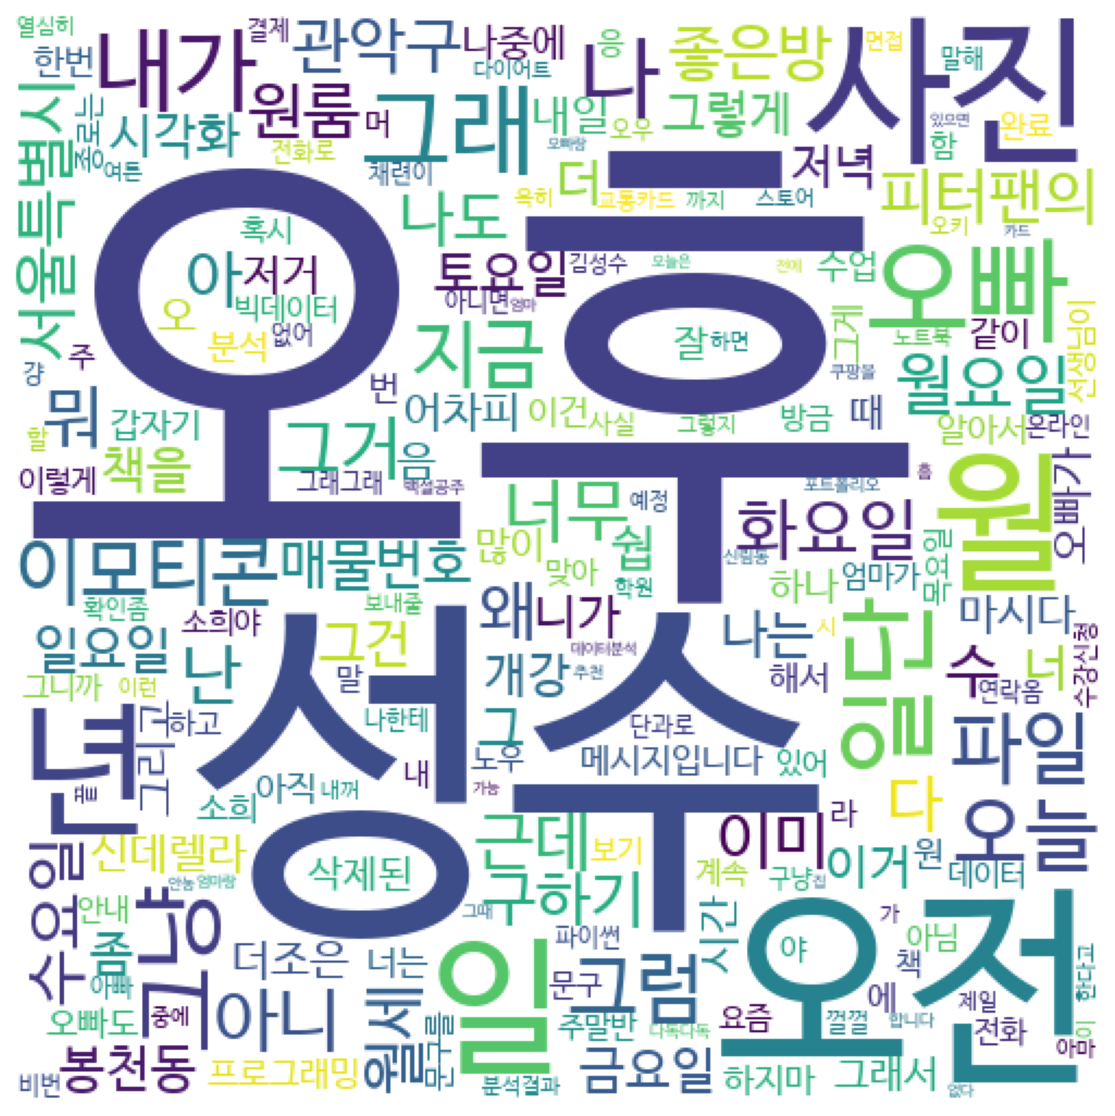

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()